In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('reg_pbp_2016.csv')
df

C:\Users\charl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,199,200,204,205,206,227,228,232,233,234,239,241,242) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,36,2016090800,DEN,CAR,DEN,home,CAR,CAR,35.0,2016-09-08,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,51,2016090800,DEN,CAR,DEN,home,CAR,DEN,75.0,2016-09-08,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,75,2016090800,DEN,CAR,DEN,home,CAR,DEN,64.0,2016-09-08,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,97,2016090800,DEN,CAR,DEN,home,CAR,DEN,64.0,2016-09-08,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,119,2016090800,DEN,CAR,DEN,home,CAR,DEN,64.0,2016-09-08,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45731,4304,2017010102,DET,GB,DET,home,GB,GB,35.0,2017-01-01,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45732,4324,2017010102,DET,GB,DET,home,GB,GB,15.0,2017-01-01,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45733,4340,2017010102,DET,GB,GB,away,DET,DET,35.0,2017-01-01,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45734,4362,2017010102,DET,GB,GB,away,DET,DET,46.0,2017-01-01,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [23]:
df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'defteam', 'side_of_field', 'yardline_100', 'down', 'ydstogo', 'play_type', 'desc', 'epa']]
df.head()

,play_id,game_id,home_team,away_team,posteam,defteam,side_of_field,yardline_100,down,ydstogo,play_type,desc,epa
0,36,2016090800,DEN,CAR,DEN,CAR,CAR,35.0,NaN,0,kickoff,"G.Gano kicks 65 yards from CAR 35 to end zone,...",0.491473
1,51,2016090800,DEN,CAR,DEN,CAR,DEN,75.0,1.0,10,pass,(15:00) T.Siemian pass short left to D.Thomas ...,1.031075
2,75,2016090800,DEN,CAR,DEN,CAR,DEN,64.0,1.0,10,pass,(14:17) T.Siemian pass incomplete short right ...,-0.714939
3,97,2016090800,DEN,CAR,DEN,CAR,DEN,64.0,2.0,10,pass,(14:13) T.Siemian pass incomplete short right ...,-1.013504
4,119,2016090800,DEN,CAR,DEN,CAR,DEN,64.0,3.0,10,pass,(14:08) (Shotgun) T.Siemian pass short left to...,2.689740


In [24]:
ne = df[df['posteam'] == 'NE']
ne = ne[(ne['down'] == 1) & (ne['ydstogo'] == 10)]
ne

,play_id,game_id,home_team,away_team,posteam,defteam,side_of_field,yardline_100,down,ydstogo,play_type,desc,epa
2319,241,2016091112,ARI,NE,NE,ARI,NE,74.0,1.0,10,pass,(11:47) (Shotgun) J.Garoppolo pass incomplete ...,-0.765359
2322,308,2016091112,ARI,NE,NE,ARI,NE,63.0,1.0,10,no_play,(10:29) L.Blount right end to NE 39 for 2 yard...,-1.166690
2324,365,2016091112,ARI,NE,NE,ARI,NE,53.0,1.0,10,run,(9:30) (Shotgun) L.Blount up the middle to NE ...,-0.358919
2326,410,2016091112,ARI,NE,NE,ARI,ARI,43.0,1.0,10,run,(8:23) L.Blount right tackle to ARI 37 for 6 y...,0.155922
2335,636,2016091112,ARI,NE,NE,ARI,NE,92.0,1.0,10,pass,(6:12) (Shotgun) J.Garoppolo pass short left t...,2.042010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44450,2705,2017010104,MIA,NE,NE,MIA,NE,91.0,1.0,10,run,(4:23) (Shotgun) L.Blount up the middle to NE ...,-0.871096
44458,2899,2017010104,MIA,NE,NE,MIA,NE,84.0,1.0,10,pass,(1:32) (Shotgun) T.Brady pass incomplete short...,-0.751116
44460,2945,2017010104,MIA,NE,NE,MIA,NE,71.0,1.0,10,no_play,(:52) C.Fleming reported in as eligible. PENA...,-0.681029
44477,3383,2017010104,MIA,NE,NE,MIA,MIA,18.0,1.0,10,run,(8:35) (Shotgun) D.Lewis right tackle to MIA 1...,-0.034782


In [33]:
groups = ne.groupby("play_type").agg({"epa":np.nanmean}).loc[['pass', 'run']]
groups

,epa
play_type,
pass,0.306637
run,-0.071455


In [44]:
groups = ne.groupby("play_type")

no_play
pass
qb_kneel
run


,play_id,game_id,home_team,away_team,posteam,defteam,side_of_field,yardline_100,down,ydstogo,play_type,desc,epa
2319,241,2016091112,ARI,NE,NE,ARI,NE,74.0,1.0,10,pass,(11:47) (Shotgun) J.Garoppolo pass incomplete ...,-0.765359
2335,636,2016091112,ARI,NE,NE,ARI,NE,92.0,1.0,10,pass,(6:12) (Shotgun) J.Garoppolo pass short left t...,2.042010
2341,768,2016091112,ARI,NE,NE,ARI,ARI,48.0,1.0,10,pass,(3:50) (Shotgun) J.Garoppolo pass short right ...,-0.220069
2344,837,2016091112,ARI,NE,NE,ARI,ARI,36.0,1.0,10,pass,(2:02) J.Garoppolo pass incomplete deep middle...,-0.490031
2363,1301,2016091112,ARI,NE,NE,ARI,NE,60.0,1.0,10,pass,(11:14) J.Garoppolo pass incomplete short left...,-0.621914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44396,1400,2017010104,MIA,NE,NE,MIA,MIA,17.0,1.0,10,pass,(5:50) (Shotgun) T.Brady pass short left to C....,-0.137218
44418,1895,2017010104,MIA,NE,NE,MIA,NE,57.0,1.0,10,pass,(:23) (Shotgun) T.Brady pass incomplete short ...,-0.239215
44421,1958,2017010104,MIA,NE,NE,MIA,MIA,43.0,1.0,10,pass,(:13) (Shotgun) T.Brady pass short left to J.W...,0.324922
44440,2438,2017010104,MIA,NE,NE,MIA,NE,80.0,1.0,10,pass,(8:35) (Shotgun) T.Brady pass short left to J....,0.305693


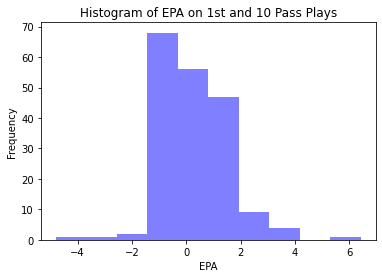

In [52]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = ne.groupby("play_type").get_group('pass')['epa']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Histogram of EPA on 1st and 10 Pass Plays')
plt.xlabel('EPA')
plt.ylabel('Frequency')
plt.show()

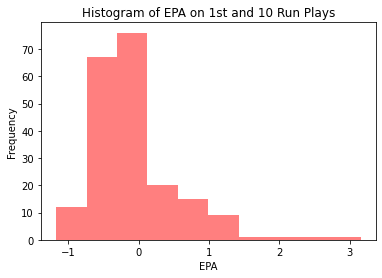

In [54]:
x = ne.groupby("play_type").get_group('run')['epa']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5)
plt.title('Histogram of EPA on 1st and 10 Run Plays')
plt.xlabel('EPA')
plt.ylabel('Frequency')
plt.show()

In [56]:
print(len(ne.groupby("play_type").get_group('run')['epa']))
len(ne.groupby("play_type").get_group('pass')['epa'])

204


189